# Notebook 3: Subgraph Counting
#### Econometric Methods for Networks
#### _CORE/UCL, December 12th to 14th, 2016_
##### _Bryan S. Graham, UC - Berkeley, bgraham@econ.berkeley.edu_
<br>
<br>
This is the third in a series of iPython Jupyter notebooks designed to accompany a series of instructional lectures given at CORE/UCL from December 12th to 14th, 2016. The scripts below were written for Python 2.7.12. The Anaconda distribution of Python, available at https://www.continuum.io/downloads, comes bundled with most the scientific computing packages used in these notebooks.
<br>
<br>
For more information about the course please visit my webpage at http://bryangraham.github.io/econometrics/.
<br>
<br>
This notebook creates the figures used in the lecture on subgraph counting. The core references for this lecture are Holland and Leinhardt (1976, _Sociological Methodology_), Bicken, Chen and Levina (2011, _Annals of Statistics_) and Bhattacharya and Bickel (2015, _Annals of Statistics_)

In [2]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Import matplotlib & networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools as it

# Directory where graphics files will be saved
graphics =  '/Users/bgraham/Dropbox/Teaching/Short_Courses/CORE_Winter_School/Lectures/'

Create graphics for key two, three and four node motifs/graphlets.

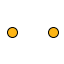

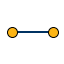

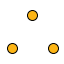

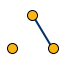

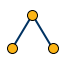

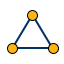

In [4]:
#---------------------------------#
#- Subgraphs with two agents     -#
#---------------------------------#

noedge=nx.Graph()                       # unconnected dyad  
noedge.add_nodes_from([1,2])

edge=nx.Graph()                         # connected dyad  
edge.add_nodes_from(noedge)
edge.add_edges_from([(1,2)])

# Generate figures for dyad configurations
# Position nodes on a line
node_pos = {1: [0,0.5], 2: [2,0.5]} 

# Empty dyad
noedge_fig = plt.figure(figsize=(1, 1))
plt.axis('off')    
ax = noedge_fig.add_subplot(1,1,1)
nx.draw_networkx(noedge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'noedge.eps', bbox_inches='tight', dpi=500)  

# Connected dyad
edge_fig = plt.figure(figsize=(1, 1))
plt.axis('off')    
ax = edge_fig.add_subplot(1,1,1)
nx.draw_networkx(edge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'edge.eps', bbox_inches='tight', dpi=500)  

#---------------------------------#
#- Subgraphs with three agents   -#
#---------------------------------#

empty=nx.Graph()                        # Empty triad
empty.add_nodes_from([1,2,3])

oneedge=nx.Graph()                      # One edge triad       
oneedge.add_nodes_from(empty)
oneedge.add_edges_from([(1,2)])

twostar=nx.Graph()                      # Two star triad
twostar.add_nodes_from(empty)
twostar.add_edges_from([(1,2),(1,3)])

triangle=nx.Graph()                     # Triangle triad   
triangle.add_nodes_from(empty)
triangle.add_edges_from([(1,2),(1,3),(2,3)])

# Position nodes in the shape of a triangle
node_pos = {1: [1,1], 2: [2,0], 3: [0,0]} 

# Empty triad
empty_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = empty_fig.add_subplot(1,1,1)
nx.draw_networkx(empty, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'empty.eps', bbox_inches='tight', dpi=500)  

# One edge triad
oneedge_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = oneedge_fig.add_subplot(1,1,1)
nx.draw_networkx(oneedge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'oneedge.eps', bbox_inches='tight', dpi=500)  

# Two star triad
twostar_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = twostar_fig.add_subplot(1,1,1)
nx.draw_networkx(twostar, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'twostar.eps', bbox_inches='tight', dpi=500)  

# Triangle triad
triangle_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = triangle_fig.add_subplot(1,1,1)
nx.draw_networkx(triangle, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'triangle.eps', bbox_inches='tight', dpi=500) 

# Tetrad graphlets

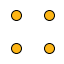

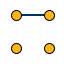

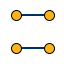

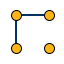

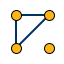

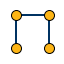

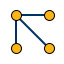

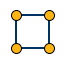

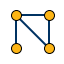

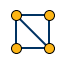

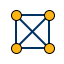

In [10]:
#---------------------------------#
#- Subgraphs with four agents    -#
#---------------------------------#

tetradempty=nx.Graph()                   # Empty
tetradempty.add_nodes_from([1,2,3,4])

tetradoneedge=nx.Graph()                 # One edge
tetradoneedge.add_nodes_from([1,2,3,4])
tetradoneedge.add_edges_from([(1,2)])

tetradtwoedge=nx.Graph()                 # Two edge
tetradtwoedge.add_nodes_from([1,2,3,4])
tetradtwoedge.add_edges_from([(1,2),(3,4)])

tetradtwostar=nx.Graph()                 # Two star
tetradtwostar.add_nodes_from([1,2,3,4])
tetradtwostar.add_edges_from([(1,2),(1,4)])

tetradonetriangle=nx.Graph()             # One triangle 
tetradonetriangle.add_nodes_from([1,2,3,4])
tetradonetriangle.add_edges_from([(1,2),(1,4),(2,4)])

fourpath=nx.Graph()                      # Four path
fourpath.add_nodes_from([1,2,3,4])
fourpath.add_edges_from([(1,4),(1,2),(2,3)])

onethreewheel=nx.Graph()                 # (1,3) wheel or 3-star
onethreewheel.add_nodes_from([1,2,3,4])
onethreewheel.add_edges_from([(1,2),(1,3),(1,4)])

fourcycle=nx.Graph()                     # Four cycle or square tetrad  
fourcycle.add_nodes_from([1,2,3,4])
fourcycle.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

tailedtriangle=nx.Graph()                # Tailed triangle
tailedtriangle.add_nodes_from([1,2,3,4])
tailedtriangle.add_edges_from([(1,2),(1,3),(2,3),(1,4)])

chordalcycle=nx.Graph()                  # Four chordalcycle
chordalcycle.add_nodes_from([1,2,3,4])
chordalcycle.add_edges_from([(1,2),(1,3),(2,3),(1,4),(3,4)])

clique=nx.Graph()                        # Four clique
clique.add_nodes_from([1,2,3,4])
clique.add_edges_from([(1,2),(1,3),(2,3),(1,4),(3,4),(2,4)])

#------------------------------------------------------------------#
#- Create untitled individual plots of all 11 tetrad isomorphisms -#
#------------------------------------------------------------------#

tetrad_isomorphisms = [tetradempty, tetradoneedge, tetradtwoedge, tetradtwostar, tetradonetriangle, \
                       fourpath, onethreewheel, fourcycle, tailedtriangle, chordalcycle, clique]

tetrad_isomorphism_names = ["Empty", "One Edge", "Two Edge", "Two Star", "Triangle", "Four Path", \
                            "Three Star", "Four Cycle", "Tailed Triangle", "Chordalcycle", "Clique"]

tetrad_isomorphism_files = ["tetradempty", "tetradoneedge", "tetradtwoedge", "tetradtwostar", "tetradonetriangle", \
                            "fourpath", "onethreewheel", "fourcycle", "tailedtriangle", "chordalcycle", "clique"]

# Position nodes in the shape of a square
node_pos = {1: [0,1], 2: [1,1], 3: [1,0], 4: [0,0]} 

for tetrad in range(0,len(tetrad_isomorphisms)):

    tetrad_fig = plt.figure(figsize=(1, 1))
    plt.axis('off') 
    ax = tetrad_fig.add_subplot(1,1,1)
    nx.draw_networkx(tetrad_isomorphisms[tetrad], pos = node_pos, with_labels=False, node_color='#FDB515', \
                     node_size = 100, \
                     edge_color='#003262', width=2)
    
    ax.axes.set_xlim([-0.25,1.25])
    ax.axes.set_ylim([-0.25,1.25])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
   
    # Save result
    plt.tight_layout()
    plt.savefig(graphics+tetrad_isomorphism_files[tetrad]+'.eps', bbox_inches='tight', dpi=500)

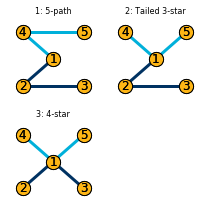

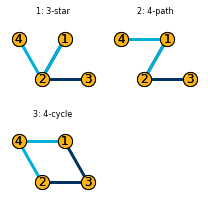

In [58]:
# Create figure object
W_q1_twostar_fig = plt.figure(figsize=(4, 4))

# Unions of two-star graphlets defined on five nodes (i.e., one node in common)
# Position Nodes
node_pos = {1: [0,0], 2: [-1,-1], 3: [1,-1], 4: [-1,1], 5: [1,1]} 

# Create five node graphlet
W_q1_twostar=nx.Graph()
W_q1_twostar.add_nodes_from([1,2,3,4,5])

#-----------------------------------#
#- Wirings (one node in common)    -#
#-----------------------------------#

T_edges  = [[(1,2),(2,3)], [(1,2),(1,3)], [(2,3),(1,3)]]
U_edges  = [[(1,4),(4,5)],[(1,4),(1,5)],[(4,5),(1,5)]]

TU = list(it.product(T_edges, U_edges))         

# Delete graphlet unions that violate W_q definition & redundant isomorphisms
del TU[2], TU[2], TU[3], TU[3], TU[3], TU[3]
W_q_names = ["5-path", "Tailed 3-star", "4-star"] 

W_q1_twostar_fig = plt.figure(figsize=(3, 3))

for w in range(0,len(TU)):
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(2,2,w+1)
    
    # Draw current wiring
    nx.draw_networkx(W_q1_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                 edgelist=TU[w][0], edge_color='#003262', width=3)
    nx.draw_networkx(W_q1_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                 edgelist=TU[w][1], edge_color='#00B0DA', width=3)
    
    plt.axis('off') 
    ax.axes.set_xlim([-1.5,1.5])
    ax.axes.set_ylim([-1.5,1.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(str(w+1)+": " + W_q_names[w] , fontsize=8)
    

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q1_twostar.png')  

#-----------------------------------#
#- Wirings (two nodes in common)   -#
#-----------------------------------#

# Create figure object
W_q2_twostar_fig = plt.figure(figsize=(4, 4))

# Unions of two-star graphlets defined on five nodes (i.e., one node in common)
# Position Nodes
node_pos = {1: [0,0], 2: [-1,-1], 3: [1,-1], 4: [-2,0]} 

# Create four node graphlet
W_q2_twostar=nx.Graph()
W_q2_twostar.add_nodes_from([1,2,3,4])

T_edges  = [[(1,2),(2,3)], [(1,2),(1,3)], [(2,3),(1,3)]]
U_edges  = [[(1,2),(2,4)],[(1,2),(1,4)],[(2,4),(1,4)]]

TU = list(it.product(T_edges, U_edges))   

# Delete graphlet unions that violate W_q definition & redundant isomorphisms
del TU[2], TU[4], TU[4], TU[4], TU[2], TU[2]
W_q_names = ["3-star", "4-path", "4-cycle"] 


W_q1_twostar_fig = plt.figure(figsize=(3, 3))

for w in range(0,len(TU)):
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(2,2,w+1)
    
    # Draw current wiring
    nx.draw_networkx(W_q2_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                 edgelist=TU[w][0], edge_color='#003262', width=3)
    nx.draw_networkx(W_q2_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                 edgelist=TU[w][1], edge_color='#00B0DA', width=3)
    nx.draw_networkx(W_q2_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 00, \
                 edgelist=Sh_edges, edge_color='#003262', style = 'dashed', width=3)
    
    plt.axis('off') 
    ax.axes.set_xlim([-2.5,1.5])
    ax.axes.set_ylim([-1.5,0.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(str(w+1)+": " + W_q_names[w] , fontsize=8)
    

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q2_twostar.png')  

#-----------------------------------#
#- Wirings (three nodes in common) -#
#-----------------------------------#

# Create figure object
W_q3_twostar_fig = plt.figure(figsize=(4, 4))

# Unions of two-star graphlets defined on five nodes (i.e., one node in common)
# Position Nodes
node_pos = {1: [0,0], 2: [-1,-1], 3: [1,-1]} 

# Create four node graphlet
W_q3_twostar=nx.Graph()
W_q3_twostar.add_nodes_from([1,2,3])

TU = [[(1,2),(2,3)], [(1,2),(1,3)], [(2,3),(1,3)]]

W_q3_twostar_fig = plt.figure(figsize=(3, 3))

for w in range(0,len(TU)):
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(2,2,w+1)
    
    # Draw current wiring
    nx.draw_networkx(W_q2_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                 edgelist=TU[w][0], edge_color='#003262', width=3)
    nx.draw_networkx(W_q2_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                 edgelist=TU[w][1], edge_color='#00B0DA', width=3)
    nx.draw_networkx(W_q2_twostar, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 00, \
                 edgelist=Sh_edges, edge_color='#003262', style = 'dashed', width=3)
    
    plt.axis('off') 
    ax.axes.set_xlim([-2.5,1.5])
    ax.axes.set_ylim([-1.5,0.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(str(w+1)+": " + W_q_names[w] , fontsize=8)
    

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q2_twostar.png')  

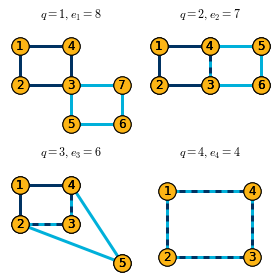

In [7]:
W_q1_example_G=nx.Graph()                    
W_q1_example_G.add_nodes_from([1,2,3,4,5,6,7])
W_q1_example_G.add_edges_from([(1,2),(2,3),(3,4),(1,4),(4,5),(5,6),(6,7),(7,4)])

W_q2_example_G=nx.Graph()                    
W_q2_example_G.add_nodes_from([1,2,3,4,5,6])
W_q2_example_G.add_edges_from([(1,2),(2,3),(3,4),(1,4),(4,5),(5,6),(6,3)])

W_q3_example_G=nx.Graph()                    
W_q3_example_G.add_nodes_from([1,2,3,4,5])
W_q3_example_G.add_edges_from([(1,2),(2,3),(3,4),(1,4),(4,5),(5,2)])

W_q4_example_G=nx.Graph()                    
W_q4_example_G.add_nodes_from([1,2,3,4])
W_q4_example_G.add_edges_from([(1,2),(2,3),(3,4),(1,4)])

# Plot W_q for 4-cycle with q = 1
# Position Nodes
node_pos = {1: [0,1], 2: [0,0], 3: [1,0], 4: [1,1], 5: [1,-1], 6: [2,-1], 7: [2,0]} 

# Group edges 
T_edges  = [(1,2),(2,3),(3,4),(1,4)]
U_edges  = [(3,5),(5,6),(6,7),(7,3)]


W_q_examples_fig = plt.figure(figsize=(4, 4))
ax = W_q_examples_fig.add_subplot(2,2,1)
nx.draw_networkx(W_q1_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=T_edges, edge_color='#003262', width=3)
nx.draw_networkx(W_q1_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=U_edges, edge_color='#00B0DA', width=3)

plt.axis('off') 
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-1.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Add title
plt.title(r'$q=1, e_{1}=8$', y=1.15, fontsize=12)

# Plot W_q for 4-cycle with q = 2
# Position Nodes
node_pos = {1: [0,1], 2: [0,0], 3: [1,0], 4: [1,1], 5: [2,1], 6: [2,0]} 

# Group edges 
T_edges  = [(1,2),(2,3),(1,4)]
Sh_edges = [(3,4)]
U_edges  = [(3,4),(4,5),(5,6),(6,3)]

ax = W_q_examples_fig.add_subplot(2,2,2)
nx.draw_networkx(W_q2_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=T_edges, edge_color='#003262', width=3)
nx.draw_networkx(W_q2_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=U_edges, edge_color='#00B0DA', width=3)
nx.draw_networkx(W_q2_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=Sh_edges, edge_color='#003262', style = 'dashed', width=3)

plt.axis('off') 
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-1.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Add title
plt.title(r'$q=2, e_{2}=7$', y=1.15, fontsize=12)

# Plot W_q for 4-cycle with q = 3
# Position Nodes
node_pos = {1: [0,1], 2: [0,0], 3: [1,0], 4: [1,1], 5: [2,-1]} 

# Group edges 
T_edges  = [(1,2),(1,4)]
Sh_edges = [(2,3),(3,4)]
U_edges  = [(2,3),(3,4),(4,5),(2,5)]



ax = W_q_examples_fig.add_subplot(2,2,3)
nx.draw_networkx(W_q3_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=T_edges, edge_color='#003262', width=3)
nx.draw_networkx(W_q3_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=U_edges, edge_color='#00B0DA', width=3)
nx.draw_networkx(W_q3_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=Sh_edges, edge_color='#003262', style = 'dashed', width=3)

plt.axis('off') 
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-1.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Add title
plt.title(r'$q=3, e_{3}=6$', y=1.15, fontsize=12)

# Plot W_q for 4-cycle with q = 4
# Position Nodes
node_pos = {1: [0,1], 2: [0,0], 3: [1,0], 4: [1,1]} 

# Group edges 
Sh_edges = [(1,2),(2,3),(3,4),(1,4)]
U_edges  = [(1,2),(2,3),(3,4),(1,4)]

ax = W_q_examples_fig.add_subplot(2,2,4)
nx.draw_networkx(W_q4_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=U_edges, edge_color='#00B0DA', width=3)
nx.draw_networkx(W_q4_example_G, pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                 edgelist=Sh_edges, edge_color='#003262', style = 'dashed', width=3)

plt.axis('off') 
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Add title
plt.title(r'$q=4, e_{4}=4$', y=1.15, fontsize=12)

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q_examples.png') 